# **Upload Data**

**Pull the Cat and Dog Images**

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-05-26 09:26:39--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-05-26 09:26:39--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc189b8d85f62b415f75fd7e27a2.dl.dropboxusercontent.com/cd/0/inline/BPMNVvXTTzjLXY2N6293wq8t84x3Vb2VW_XKup-qhVbRL4xhfxUZdQ6g0fFzZFrM35O_NpGG_z3TdDTfqETKMWVReagC1OSqs7IthJk2VP29I4vjCVL0R6clAgcgaXxHbRYlf6KOVwAIWU4TL3bOkNbU/file# [following]
--2021-05-26 09:26:39--  https://uc189b8d85f62b415f75fd7e27a2.dl.dropboxusercontent.com/cd/0/inline/BPMNVvXTTzjLXY2N6293wq8t84x3Vb2VW_XKup-qhVbRL4xhfxUZdQ6g0fFzZFrM35O_NpGG_z3TdD

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

**Visualize sample image**

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

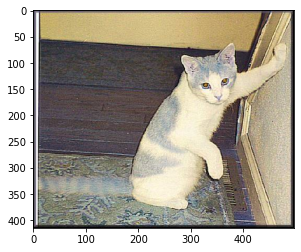

In [4]:
# Sample Cat test image

sample_cat = cv2.imread('/content/test_set/test_set/cats/cat.4001.jpg')
plt.imshow(sample_cat)

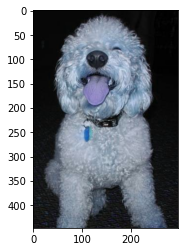

In [5]:
# Sample Dog test image

sample_dog = cv2.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
plt.imshow(sample_dog)

**Convert images to numeric data using ImageDataGenerator**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 150,150  #width and height of the images
batch_size= 20

train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"

Training Data

In [7]:
train_datagen=ImageDataGenerator( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [20]:
print(train_generator[0])

(array([[[[0.29411766, 0.5921569 , 0.78729355],
         [0.29411766, 0.5921569 , 0.787297  ],
         [0.29411766, 0.5921569 , 0.7873005 ],
         ...,
         [0.59479   , 0.73596644, 0.93204486],
         [0.59480035, 0.7359769 , 0.9320553 ],
         [0.59481084, 0.7359873 , 0.9320658 ]],

        [[0.29411766, 0.5921569 , 0.7843138 ],
         [0.29411766, 0.5921569 , 0.7843138 ],
         [0.29411766, 0.5921569 , 0.7843138 ],
         ...,
         [0.5844275 , 0.72560394, 0.92168236],
         [0.58442044, 0.7255969 , 0.9216754 ],
         [0.5844135 , 0.72559   , 0.9216684 ]],

        [[0.29411766, 0.5921569 , 0.7845102 ],
         [0.29411766, 0.5921569 , 0.78450674],
         [0.29411766, 0.5921569 , 0.7845033 ],
         ...,
         [0.59152526, 0.7327017 , 0.92878014],
         [0.5915182 , 0.73269475, 0.92877316],
         [0.5915113 , 0.7326878 , 0.92876625]],

        ...,

        [[0.45767057, 0.5478667 , 0.6733569 ],
         [0.45763573, 0.5478318 , 0.67332196

Test Data

In [8]:
test_datagen=ImageDataGenerator (rescale=1. /255)
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


# Building the model

In [9]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

Change Learning rate if accuracy is stagnant for more than 2 rounds

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

**Model 1**

In [12]:
callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [13]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [14]:
nb_train_sample =100
nb_validation_samples =100
epochs =20

In [15]:
training = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 18s 163ms/step - loss: 1.1805 - accuracy: 0.5451 - val_loss: 0.6545 - val_accuracy: 0.6380
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6694 - accuracy: 0.5965 - val_loss: 0.6531 - val_accuracy: 0.6130
Epoch 3/20
100/100 [==============================] - 16s 161ms/step - loss: 0.6663 - accuracy: 0.5899 - val_loss: 0.6434 - val_accuracy: 0.6330
Epoch 4/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6468 - accuracy: 0.6250 - val_loss: 0.6382 - val_accuracy: 0.6270
Epoch 5/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6414 - accuracy: 0.6418 - val_loss: 0.6087 - val_accuracy: 0.6805
Epoch 6/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6498 - accuracy: 0.6350 - val_loss: 0.6247 - val_accuracy: 0.6640
Epoch 7/20
100/100 [==============================] - 16s 161ms/step - loss: 0.6344 - accuracy: 0.6504 - val_loss: 0.6061 - val_accuracy: 0.6

Find Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


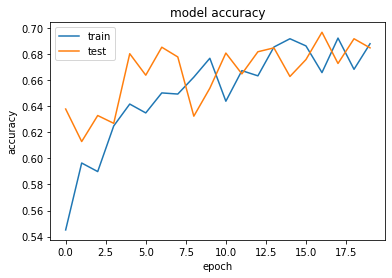

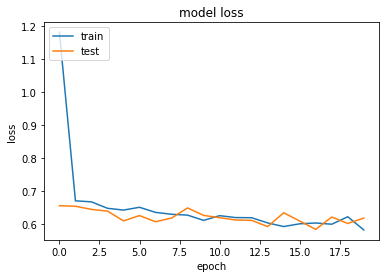

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predict The Image

[[1.]]
Prediction:  Dog


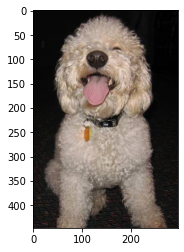

In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[3.40149e-28]]
Prediction:  Cat


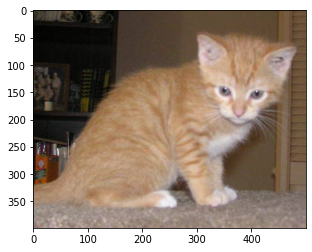

In [19]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

# Summary of how code works

Below is how this model works - 

1. We copy the image from internet to our work space on google colab
2. Unzip the files to create separate training and test data set
3. We use ImageDataGenerator to convert the images to numeric data so that model can process. The image data generator categorises the data based on folder they are in.
4. Build model with reducing learning rate if the accuracy is stuck at some point
5. Compile the model using Adam Optimiser and binary_crossentropy loss function
6. Train the model
7. Predict using the model on test data set